## Data Augmentation

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [18]:
df = pd.read_csv('labelled_data1.csv')
df.head()

,Unnamed: 0,Analysis,Attribute,Standard names,Unnamed: 4
0,0,HPLC,AEX-HPLC TOTAL ACIDIC PEAKS,AEX ACIDIC PEAKS,NaN
1,1,BIO_ICIEF,AEX HPLC-ACIDIC PEAKS,AEX ACIDIC PEAKS,NaN
2,2,HPLC,AEX TOTAL ACIDIC PEAKS,AEX ACIDIC PEAKS,NaN
3,3,HPLC,AEX-HPLC ACIDIC PEAKS,AEX ACIDIC PEAKS,NaN
4,4,BIO_ICIEF,AEX-HPLC TOTAL ACIDIC PEAKS,AEX ACIDIC PEAKS,NaN


In [19]:
df = df.applymap(lambda x: str(x).strip().lower())

<ipython-input-19-888ccb0fcd43>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).strip().lower())


In [20]:
df['Standard names'].value_counts()

,count
Standard names,
icief main peak,79
potency by binding elisa,72
ph,69
protein concentration (a280),54
irrelevant,49
sds-page (non-reduced) purity,47
icief acidic peaks,46
sds-page (reduced) purity,42
icief basic peaks,40


Shape of data before augmentation: (913, 5)
Shape of data after augmentation: (3280, 5)


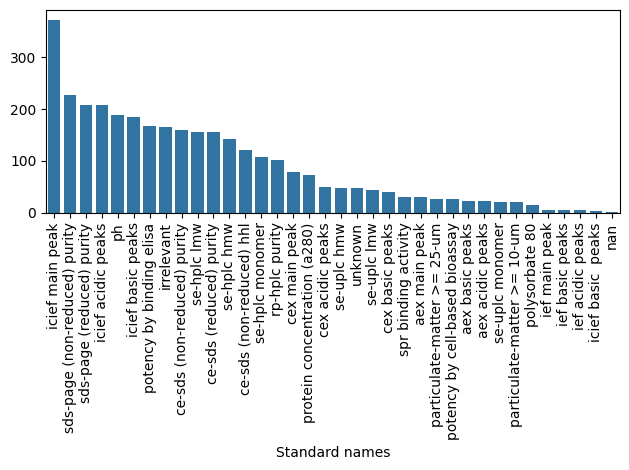

In [21]:
print("Shape of data before augmentation:", df.shape)
full_form = {
    "CE": "Capillary Electrophoresis",
    "SDS": "Sodium Dodecyl Sulfate",
    "PAGE": "Polyacrylamide Gel Electrophoresis",
    "RP": "Reverse Phase",
    "HPLC": "High-Performance Liquid Chromatography",
    "IEF": "Isoelectric Focusing",
    "iCIEF": "Isoelectric Focusing Capillary Electrophoresis",
    "ICIEF": "Isoelectric Focusing Capillary Electrophoresis",
    "CEX": "Cation Exchange",
    "AEX": "Anion Exchange",
    "SE": "Size Exclusion",
    "HIAC": "High-Accuracy Particle Counter",
    "UV": "Ultraviolet",
    "ELISA": "Enzyme-Linked Immunosorbent Assay",
    "SPR": "Surface Plasmon Resonance",
    "pH": "potential of Hydrogen",
    "A280": "Absorbance at 280 nanometers",
    "HHL": "Heavy-Heavy-Light",
    "HMW": "High Molecular Weight",
    "LMW": "Low Molecular Weight"
}
augment_list = []
for idx in range(df.shape[0]):
    for abbr in full_form.keys():
        pattern = rf'(^|[\s\-_])({re.escape(abbr)})($|[\s\-_])'

        if re.search(pattern, df.loc[idx, "Analysis"], flags=re.IGNORECASE):
            new_row = df.iloc[idx].copy()
            new_row["Analysis"] = re.sub(pattern, lambda m: f"{m.group(1)}{full_form[abbr]}{m.group(3)}", new_row["Analysis"], flags=re.IGNORECASE)
            augment_list.append(new_row)
        if re.search(pattern, df.loc[idx, "Attribute"], flags=re.IGNORECASE):
            new_row = df.iloc[idx].copy()
            new_row["Attribute"] = re.sub(pattern, lambda m: f"{m.group(1)}{full_form[abbr]}{m.group(3)}", new_row["Attribute"], flags=re.IGNORECASE)
            augment_list.append(new_row)
augmented_data = pd.concat([df, pd.DataFrame(augment_list)], ignore_index=True)

print("Shape of data after augmentation:", augmented_data.shape)
sns.barplot(x=augmented_data["Standard names"].value_counts().index, y=augmented_data["Standard names"].value_counts().values)
plt.xticks(rotation=90)
plt.tight_layout()

In [22]:

augmented_data.to_csv("augmented_labelled_data.csv", index=False)